# Information Metrics

This notebooks runs information theory metrics on time series signals, including several entropy measures. 

This notebook includes:
- approximate entropy
- sample entropy
- permutation entropy
- spectral entropy

Notes:
- sample & approximate entroy are pretty similar, maybe don't need both (?)
- other metrics we don't currently consider: multiscale entropy, weighted permutation entropy
- there are important parameter inputs to these measures, that could be explored

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.run import run_sims_parallel as run_sims
from apm.methods import sample_entropy, perm_entropy, app_entropy, spectral_entropy
from apm.methods.settings import SA_ENT_PARAMS, PE_ENT_PARAMS, AP_ENT_PARAMS, SP_ENT_PARAMS

from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL

from apm.sim.settings import FS, SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [3]:
# Custom settings
N_SIMS = 10

In [4]:
# Check settings for entropy measurs
print('Sample Entropy: \t', SA_ENT_PARAMS)
print('Permutation Entropy:\t', PE_ENT_PARAMS)
print('Approximate Entropy:\t', AP_ENT_PARAMS)
print('Spectral Entropy:\t', SP_ENT_PARAMS)

Sample Entropy: 	 {'order': 2}
Permutation Entropy:	 {'order': 3, 'delay': 1}
Approximate Entropy:	 {'order': 2}
Spectral Entropy:	 {'sf': 1000, 'method': 'fft'}


In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Notebook Settings
SAVE_FIG = False

## Calculating Entropy Measures on Example Signals

Entropy measures generally measure the level of 'randomness' or complexity in a signal. 

In all cases, smaller values of measured entropy indicate more regular time series. 

In [7]:
print('Computed approximate entropy:')
print('  powerlaw: \t {:1.4f}'.format(app_entropy(SIG_AP, **AP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(app_entropy(SIG_OSC, **AP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(app_entropy(SIG_COMB, **AP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(app_entropy(SIG_KN, **AP_ENT_PARAMS)))

Computed approximate entropy:
  powerlaw: 	 0.4097
  osc:      	 0.2010
  combined: 	 1.0141
  knee:     	 1.4911


In [8]:
print('Computed sample entropy:')
print('  powerlaw: \t {:1.4f}'.format(sample_entropy(SIG_AP, **SA_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(sample_entropy(SIG_OSC, **SA_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(sample_entropy(SIG_COMB, **SA_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(sample_entropy(SIG_KN, **SA_ENT_PARAMS)))

Computed sample entropy:
  powerlaw: 	 0.3796
  osc:      	 0.1629
  combined: 	 0.9213
  knee:     	 1.3736


In [9]:
print('Computed permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(perm_entropy(SIG_AP, **PE_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(perm_entropy(SIG_OSC, **PE_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(perm_entropy(SIG_COMB, **PE_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(perm_entropy(SIG_KN, **PE_ENT_PARAMS)))

Computed permutation entropy:
  powerlaw: 	 2.5213
  osc:      	 1.1414
  combined: 	 2.5198
  knee:     	 2.5091


In [10]:
print('Computed spectral entropy:')
print('  powerlaw: \t {:1.4f}'.format(spectral_entropy(SIG_AP, **SP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(spectral_entropy(SIG_OSC, **SP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(spectral_entropy(SIG_COMB, **SP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(spectral_entropy(SIG_KN, **SP_ENT_PARAMS)))

Computed spectral entropy:
  powerlaw: 	 4.2230
  osc:      	 0.0000
  combined: 	 7.4309
  knee:     	 10.8893


## Approximate Entropy

Approximate entropy quantifies the unpredictability of a time series.

#### Aperiodic Variations

In [11]:
# Run simulations calculating approximate entropy across exponents
outs = run_sims(sim_powerlaw, SIM_PARAMS_AP, app_entropy, AP_ENT_PARAMS, 
                'update_exp', EXPS, N_SIMS, var_func=np.std)
ap_ents, ap_ents_var = outs

In [12]:
# Run simulations calculating approximate entropy across exponents, with an oscillation
outs = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS, 
                'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
ap_ents_comb, ap_ents_comb_var = outs

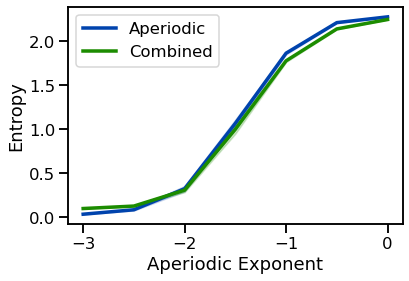

In [13]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, ap_ents, ap_ents_var, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, ap_ents_comb, ap_ents_comb_var, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_both', file_path='info')

#### Periodic Variations

In [14]:
# Run simulations calculating approximate entropy across oscillation frequency
outs = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS,
                'update_freq', FREQS, N_SIMS, var_func=np.std)
ap_sims_freq, ap_sims_freq_var = outs

In [15]:
# Run simulations calculating approximate entropy across oscillation power
outs = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS,
                'update_pow', POWERS, N_SIMS, var_func=np.std)
ap_sims_pow, ap_sims_pow_var = outs

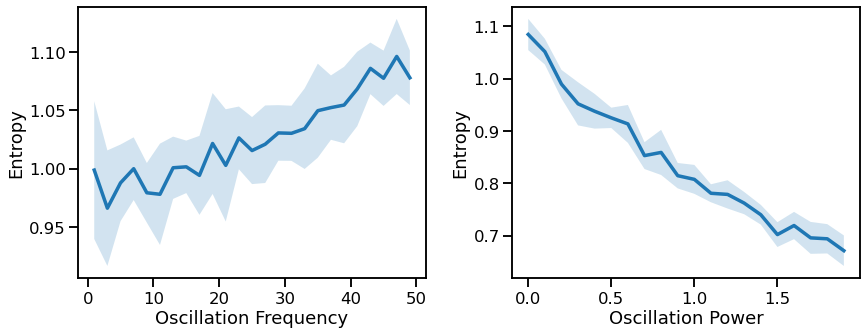

In [16]:
# Plot effect of oscillation variations on approximate entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, ap_sims_freq, ap_sims_freq_var, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy', ax=axes[0])
plot_lines(POWERS, ap_sims_pow, ap_sims_pow_var, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Entropy', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_power', file_path='info')

## Sample Entropy

Sample entropy is a modification of approxmiate entropy for physiological time series.

The modifications of sample entropy make it data length independent.

#### Aperiodic Variations

In [17]:
# Run simulations calculating sample entropy across exponents
outs = run_sims(sim_powerlaw, SIM_PARAMS_AP, sample_entropy, SA_ENT_PARAMS,
                'update_exp', EXPS, N_SIMS, var_func=np.std)
sa_ents, sa_ents_var = outs

In [18]:
# Run simulations calculating sample entropy across exponents, with an oscillation
outs = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
                'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
sa_ents_comb, sa_ents_comb_var = outs

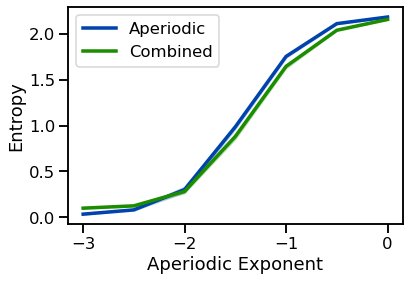

In [19]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, sa_ents, sa_ents_var, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, sa_ents_comb, sa_ents_comb_var, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_both', file_path='info')

#### Periodic Variations

In [20]:
# Run simulations calculating sample entropy across oscillation frequency
outs = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
                'update_freq', FREQS, N_SIMS, var_func=np.std)
sa_sims_freq, sa_sims_freq_var = outs

In [21]:
# Run a set of simulations, calculating sample entropy across oscillation power
outs = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
                'update_pow', POWERS, N_SIMS, var_func=np.std)
sa_sims_pow, sa_sims_pow_var = outs

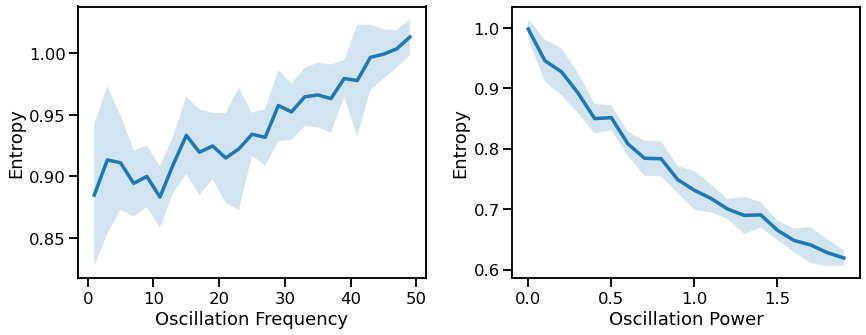

In [22]:
# Plot effect of oscillation variation on sample entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, sa_sims_freq, sa_sims_freq_var, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy', ax=axes[0])
plot_lines(POWERS, sa_sims_pow, sa_sims_pow_var, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Entropy', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='se_osc_both', file_path='info')

## Permutation Entropy

Permutation entropy is a measure of entropy based on the probabilities of sequences within the time series.

Permutation entropy was introduced in 2002 by Bandt & Pompe.

#### Aperiodic Variations

In [24]:
# Run simulations calculating permutation entropy across exponents
outs = run_sims(sim_powerlaw, SIM_PARAMS_AP, perm_entropy, PE_ENT_PARAMS,
                'update_exp', EXPS, N_SIMS, var_func=np.std)
pe_ents, pe_ents_var = outs

In [25]:
# Run simulations calculating permutation entropy across exponents, with an oscillation
outs = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
                'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
pe_ents_comb, pe_ents_comb_var = outs

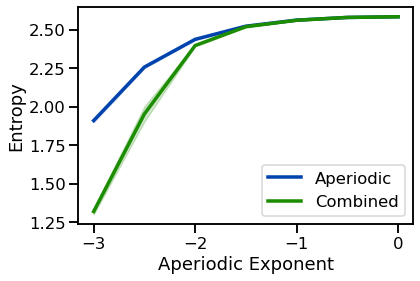

In [26]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, pe_ents, pe_ents_var, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, pe_ents_comb, pe_ents_comb_var, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_both', file_path='info')

In [27]:
# Run a set of simulations, calculating permutation entropy across oscillation frequency
outs = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
                'update_freq', FREQS, N_SIMS, var_func=np.std)
pe_sims_freq, pe_sims_freq_var = outs

In [28]:
# Run simulations calculating permutation entropy across oscillation power
outs = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
                'update_pow', POWERS, N_SIMS, var_func=np.std)
pe_sims_pow, pe_sims_pow_var = outs

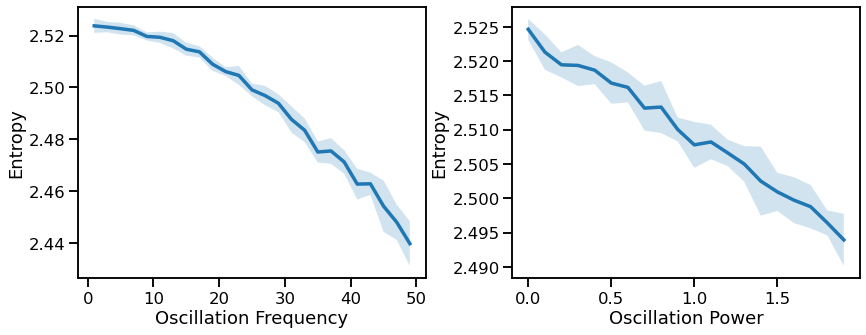

In [29]:
# Plot effect of oscillation variation on sample entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, pe_sims_freq, pe_sims_freq_var, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy', ax=axes[0])
plot_lines(POWERS, pe_sims_pow, pe_sims_pow_var, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Entropy', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='pe_osc_both', file_path='info')

## Spectral Entropy

The spectral entropy measures the entropy of the power spectrum.

In [31]:
# Run simulations calculating spectral entropy across exponents
outs = run_sims(sim_powerlaw, SIM_PARAMS_AP, spectral_entropy, SP_ENT_PARAMS, 
                'update_exp', EXPS, N_SIMS, var_func=np.std)
sp_ents, sp_ents_var = outs

In [32]:
# Run simulations calculating spectral entropy across exponents, with an oscillation
outs = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS, 
                'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
sp_ents_comb, sp_ents_comb_var = outs

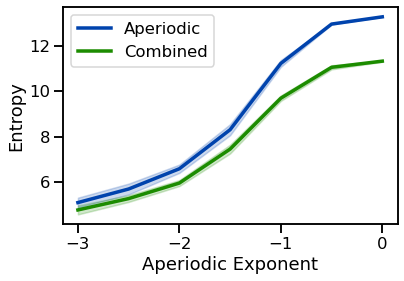

In [33]:
# Plot spectral entropy measures for with & without oscillation together
plot_lines(EXPS, sp_ents, sp_ents_var, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, sp_ents_comb, sp_ents_comb_var, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_both', file_path='info')

#### Periodic Variations

In [34]:
# Run simulations calculating spectral entropy across oscillation frequency
outs = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS,
                'update_freq', FREQS, N_SIMS, var_func=np.std)
sp_sims_freq, sp_sims_freq_var = outs

In [35]:
# Run simulations calculating spectral entropy across oscillation power
outs = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS,
                'update_pow', POWERS, N_SIMS, var_func=np.std)
sp_sims_pow, sp_sims_pow_var = outs

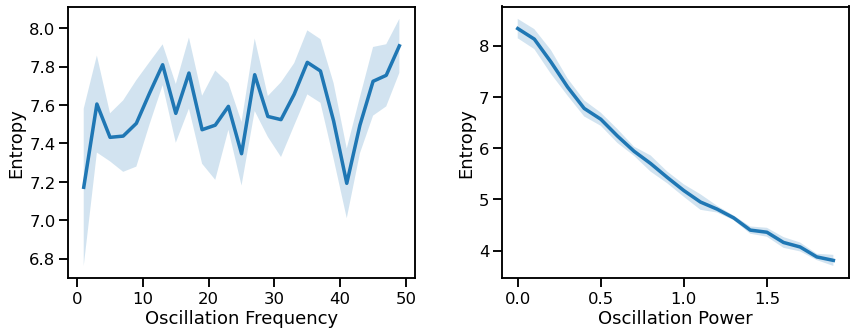

In [36]:
# Plot effect of oscillation variation on sample entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, sp_sims_freq, sp_sims_freq_var, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy', ax=axes[0])
plot_lines(POWERS, sp_sims_pow, sp_sims_pow_var, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Entropy', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_both', file_path='info')

## Conclusions

Overall, we can see the following patterns in these simulations:

Entropy (general patterns across all):
- Entropy increases for decreasing aperiodic exponents, non-linearly
- Entropy decreases for increasing oscillatory power, approximately linearly